In [15]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [16]:
def show_image(title, image):
    plt.figure(figsize=(8, 6))
    if len(image.shape) == 3:  # Color image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:  # Grayscale image
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [48]:
from google.colab import files
uploaded = files.upload()

Saving template.png to template.png


In [27]:
# Load the image
def load_image(image_path):
    return cv2.imread(image_path)

In [28]:
# Example: Load the image
image_path = "objects.jpg"  # Replace with the name of your uploaded image
image = load_image(image_path)

In [29]:
# 1. Line extraction using Hough Transform
def extract_lines(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    line_image = image.copy()
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * a)
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * a)
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return line_image

In [20]:
# 2. Template matching for object detection
def template_matching(image, template):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    res = cv2.matchTemplate(gray_image, gray_template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    h, w = gray_template.shape
    bottom_right = (top_left[0] + w, top_left[1] + h)
    result_image = image.copy()
    cv2.rectangle(result_image, top_left, bottom_right, (0, 255, 0), 2)
    return result_image

In [21]:
# 3. Image pyramid creation
def create_image_pyramid(image, levels=3):
    pyramid = [image]
    for i in range(1, levels):
        image = cv2.pyrDown(image)
        pyramid.append(image)
    return pyramid

In [22]:
# 4. Circle detection using Hough Transform
def detect_circles(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.medianBlur(gray, 5)
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
    circle_image = image.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(circle_image, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(circle_image, (i[0], i[1]), 2, (0, 0, 255), 3)
    return circle_image

In [23]:
# 5. Extract dominant color from the image
def extract_dominant_color(image, k=3):
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    dominant_color = kmeans.cluster_centers_[0].astype(int)
    return tuple(dominant_color)

In [24]:
# 6. Contour detection in the image
def detect_contours(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = image.copy()
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3)
    return contour_image

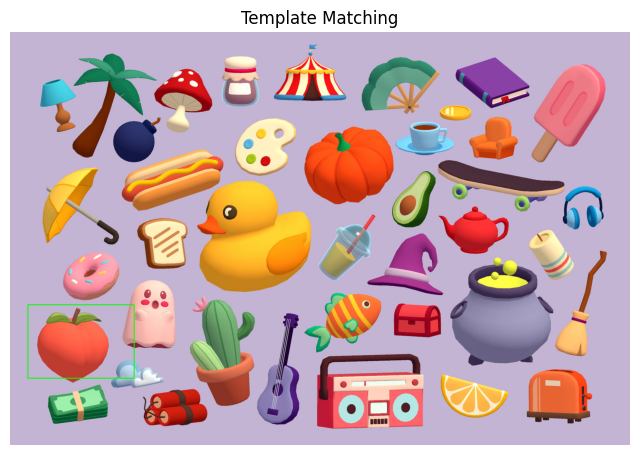

In [50]:
# Template Matching (requires template image)
template_path = "template.png"  # Replace with your template image name
template = load_image(template_path)
matched_image = template_matching(image, template)
show_image("Template Matching", matched_image)

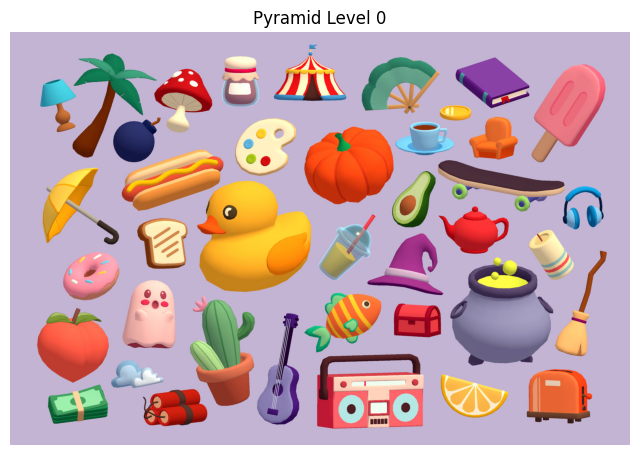

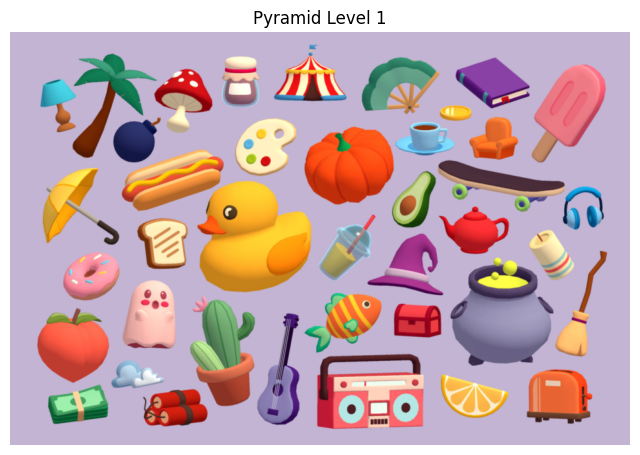

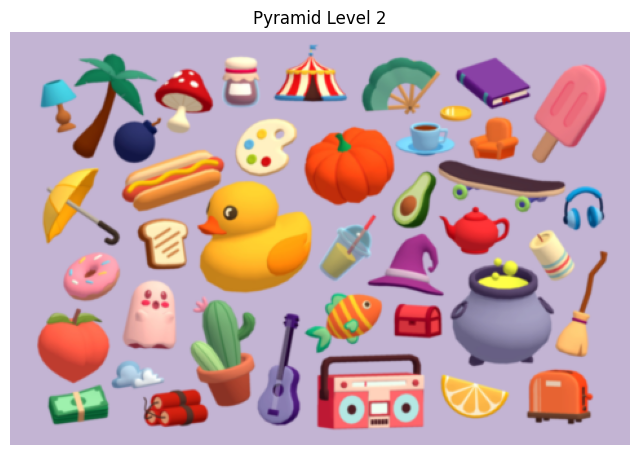

In [43]:
# Pyramid
pyramid_images = create_image_pyramid(image)
for i, img in enumerate(pyramid_images):
    show_image(f"Pyramid Level {i}", img)

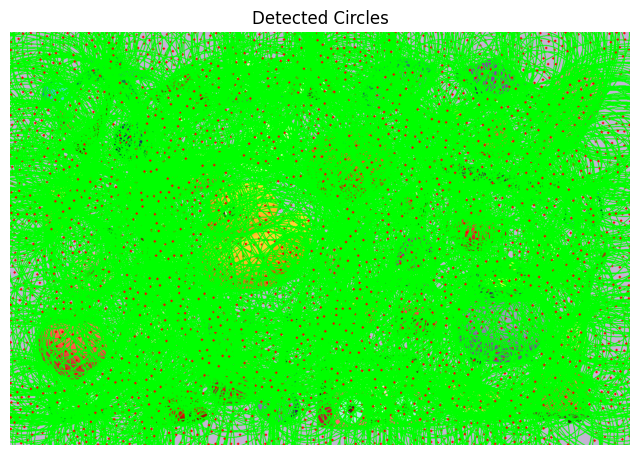

In [31]:
# Circles
detected_circles_image = detect_circles(image)
show_image("Detected Circles", detected_circles_image)

In [32]:
# Dominant Color
dominant_color = extract_dominant_color(image)
print("Dominant Color:", dominant_color)

Dominant Color: (206, 182, 196)


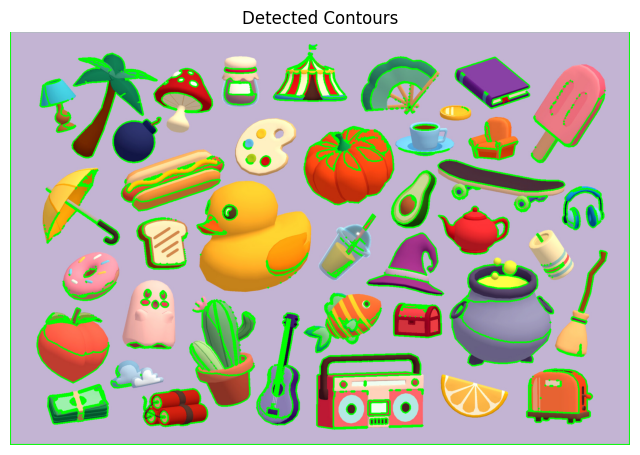

In [33]:
# Contours
contours_image = detect_contours(image)
show_image("Detected Contours", contours_image)